In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer
from qiskit.tools import job_monitor
from qiskit.visualization import array_to_latex

In [3]:
from qiskit_rigetti import RigettiQCSBackend, RigettiQCSJob, RigettiQCSProvider
from qiskit_rigetti import QuilCircuit

In [4]:
# Get provider and backend
provider = RigettiQCSProvider()
provider.backends()

[<RigettiQCSBackend('Aspen-12')>,
 <RigettiQCSBackend('Aspen-M-2')>,
 <RigettiQCSBackend('Aspen-M-3')>]

In [5]:
backend = provider.get_backend("Aspen-M-3")
backend

<RigettiQCSBackend('Aspen-M-3')>

In [6]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [7]:
num_qubits = 2
qr = QuantumRegister(num_qubits)
meas_calibs, state_labels = complete_meas_cal(qr=qr)
len(meas_calibs)

4

In [8]:
meas_calibs[0].draw()

░ ┌─┐   
q0_0: ─░─┤M├───
       ░ └╥┘┌─┐
q0_1: ─░──╫─┤M├
       ░  ║ └╥┘
c0: 2/════╩══╩═
          0  1

In [9]:
path = [7,0,1,16,17,10,11,26,27,20,21,36,37,30,31,46,47,40]

In [10]:
# Execute the circuit on the backend
jobs = []
job_ids = []
results = []

for i in path:
    print("started", 6, "and", i)
    job = execute(meas_calibs, backend, shots=1 << 13, initial_layout=[6,i], optimization_level=3)
    jobs.append(job)
    print("job_id:", job.job_id())
    job_ids.append(job.job_id())
    with open("20211013_TwoQubitCrossTalk_AspenM3_Jobs.pkl", "wb") as f:
        pickle.dump(job_ids, f)
    print("finished", 6, "and", i)
    print()

started 6 and 7


/opt/conda/lib/python3.9/site-packages/qiskit_rigetti/_qcs_job.py:117: UserWarning: barriers are currently omitted during execution on a RigettiQCSBackend
  warnings.warn("barriers are currently omitted during execution on a RigettiQCSBackend")


job_id: 099f12ea-2c10-4771-b061-1791fdfac4d8
finished 6 and 7

started 6 and 0
job_id: e79fe2ff-7f66-40ad-b2f1-e898f29aec90
finished 6 and 0

started 6 and 1
job_id: ed32b1e0-f5e0-4242-be3b-0b2b72a41fdf
finished 6 and 1

started 6 and 16
job_id: e96a3f4d-df65-4d10-b48a-440c0da0b918
finished 6 and 16

started 6 and 17
job_id: a0680be2-83ab-437a-ac8c-aaab9b86e351
finished 6 and 17

started 6 and 10
job_id: bb5167f1-5508-4080-841a-384f64bd1f56
finished 6 and 10

started 6 and 11
job_id: ffcace61-5e4e-44bc-8580-ba5ea7cc82d6
finished 6 and 11

started 6 and 26
job_id: 45e3db8c-f03e-4c99-a4ba-982f89fe1ed0
finished 6 and 26

started 6 and 27
job_id: 4f690de9-70c2-4832-a960-bd3dd18bf44a
finished 6 and 27

started 6 and 20
job_id: 1e1b6ac7-ed20-4710-ba6b-f9e4a6fcf34f
finished 6 and 20

started 6 and 21
job_id: ee9df152-429e-46c6-a3e2-4f22df478460
finished 6 and 21

started 6 and 36
job_id: 7750d0a0-874d-481e-9f12-3e85fb351272
finished 6 and 36

started 6 and 37
job_id: 9251c29a-6fba-40cb-9c28-3

In [11]:
for job in jobs:
    job_monitor(job)

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [12]:
# Execute the circuit on the backend
results = []
for job in jobs:
    results.append(job.result())
    with open("20211013_TwoQubitCrossTalk_AspenM3_Results.pkl", "wb") as f:
        pickle.dump(results ,f)

In [13]:
meas_fitters = []
for result in results:
    meas_fitter = CompleteMeasFitter(result, state_labels)
    meas_fitters.append(meas_fitter)
with open("20211013_TwoQubitCrossTalk_AspenM3_Meas_Fitters.pkl", "wb") as f:
    pickle.dump(meas_fitters ,f)

In [14]:
with open("20211013_TwoQubitCrossTalk_AspenM3_Readout_Error.pkl", "wb") as f:
    pickle.dump({"results": results, "meas_fitters": meas_fitters, "time": "2023-01-13-2100-BST"}, f)

In [15]:
cal_matrices = []
for meas_fitter in meas_fitters:
    cal_matrices.append(meas_fitter.cal_matrix)
with open("20211013_TwoQubitCrossTalk_AspenM3_CalMatrices.pkl", "wb") as f:
    pickle.dump(cal_matrices ,f)

In [17]:
array_to_latex(cal_matrices[1])

<IPython.core.display.Latex object>

In [19]:
import pickle
with open("20211013_TwoQubitCrossTalk_AspenM3_Readout_Error.pkl", "rb") as f:
    data = pickle.load(f)

In [20]:
data.keys()

dict_keys(['results', 'meas_fitters', 'time'])

In [21]:
meas_fitters = data["meas_fitters"]

In [26]:
meas_fitters[0].cal_matrix

array([[9.76684570e-01, 1.89208984e-02, 4.18701172e-02, 4.88281250e-04],
       [3.17382812e-03, 9.57153320e-01, 1.22070312e-04, 4.24804688e-02],
       [1.98974609e-02, 1.09863281e-03, 9.53857422e-01, 1.68457031e-02],
       [2.44140625e-04, 2.28271484e-02, 4.15039062e-03, 9.40185547e-01]])

In [27]:
for i in range(len(meas_fitters)):
    print(meas_fitters[i].cal_matrix)

[[9.76684570e-01 1.89208984e-02 4.18701172e-02 4.88281250e-04]
 [3.17382812e-03 9.57153320e-01 1.22070312e-04 4.24804688e-02]
 [1.98974609e-02 1.09863281e-03 9.53857422e-01 1.68457031e-02]
 [2.44140625e-04 2.28271484e-02 4.15039062e-03 9.40185547e-01]]
[[9.46655273e-01 1.75781250e-02 6.10351562e-02 6.10351562e-04]
 [2.56347656e-03 9.33471680e-01 2.44140625e-04 6.37207031e-02]
 [5.06591797e-02 1.34277344e-03 9.34692383e-01 1.81884766e-02]
 [1.22070312e-04 4.76074219e-02 4.02832031e-03 9.17480469e-01]]
[[9.78393555e-01 2.19726562e-02 5.52978516e-02 1.34277344e-03]
 [5.61523438e-03 9.61303711e-01 3.66210938e-04 5.87158203e-02]
 [1.59912109e-02 6.10351562e-04 9.40063477e-01 2.02636719e-02]
 [0.00000000e+00 1.61132812e-02 4.27246094e-03 9.19677734e-01]]
[[9.57031250e-01 1.97753906e-02 1.53808594e-02 2.44140625e-04]
 [3.66210938e-03 9.13085938e-01 1.22070312e-04 1.17187500e-02]
 [3.93066406e-02 1.70898438e-03 9.79736328e-01 1.97753906e-02]
 [0.00000000e+00 6.54296875e-02 4.76074219e-03 9.682

In [28]:
for i in range(len(meas_fitters)):
    np.savetxt("20211013_TwoQubitCrossTalk_AspenM3_Save_CalMatrices.txt", meas_fitters[i].cal_matrix, delimiter=',')

In [29]:
for i in range(len(meas_fitters)):
    with open("20211013_TwoQubitCrossTalk_AspenM3_Save_CalMatrices.txt", "a") as f:
        np.savetxt(f, meas_fitters[i].cal_matrix, delimiter=',')
    # f.write("\n")

In [30]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

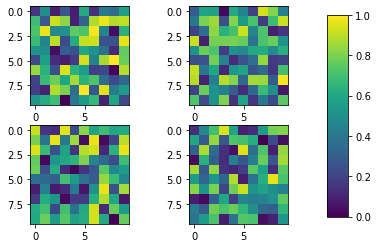

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [32]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [33]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

C_p = 20 # Classes

colours = get_cmap(C_p, name='tab20c')#mpl.colors.ListedColormap(colours_rgb)



# make a color map of fixed colors

bounds=np.linspace(start=0, stop=1.0, num=21)

norm = mpl.colors.BoundaryNorm(bounds, C_p)

In [34]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
norm = mpl.colors.Normalize(vmin=0, vmax=0.15)

#cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                norm=norm,
#                                orientation='horizontal')

[[9.76684570e-01 1.89208984e-02 4.18701172e-02 4.88281250e-04]
 [3.17382812e-03 9.57153320e-01 1.22070312e-04 4.24804688e-02]
 [1.98974609e-02 1.09863281e-03 9.53857422e-01 1.68457031e-02]
 [2.44140625e-04 2.28271484e-02 4.15039062e-03 9.40185547e-01]]
[[9.46655273e-01 1.75781250e-02 6.10351562e-02 6.10351562e-04]
 [2.56347656e-03 9.33471680e-01 2.44140625e-04 6.37207031e-02]
 [5.06591797e-02 1.34277344e-03 9.34692383e-01 1.81884766e-02]
 [1.22070312e-04 4.76074219e-02 4.02832031e-03 9.17480469e-01]]
[[9.78393555e-01 2.19726562e-02 5.52978516e-02 1.34277344e-03]
 [5.61523438e-03 9.61303711e-01 3.66210938e-04 5.87158203e-02]
 [1.59912109e-02 6.10351562e-04 9.40063477e-01 2.02636719e-02]
 [0.00000000e+00 1.61132812e-02 4.27246094e-03 9.19677734e-01]]
[[9.57031250e-01 1.97753906e-02 1.53808594e-02 2.44140625e-04]
 [3.66210938e-03 9.13085938e-01 1.22070312e-04 1.17187500e-02]
 [3.93066406e-02 1.70898438e-03 9.79736328e-01 1.97753906e-02]
 [0.00000000e+00 6.54296875e-02 4.76074219e-03 9.682

TypeError: 'AxesSubplot' object is not iterable

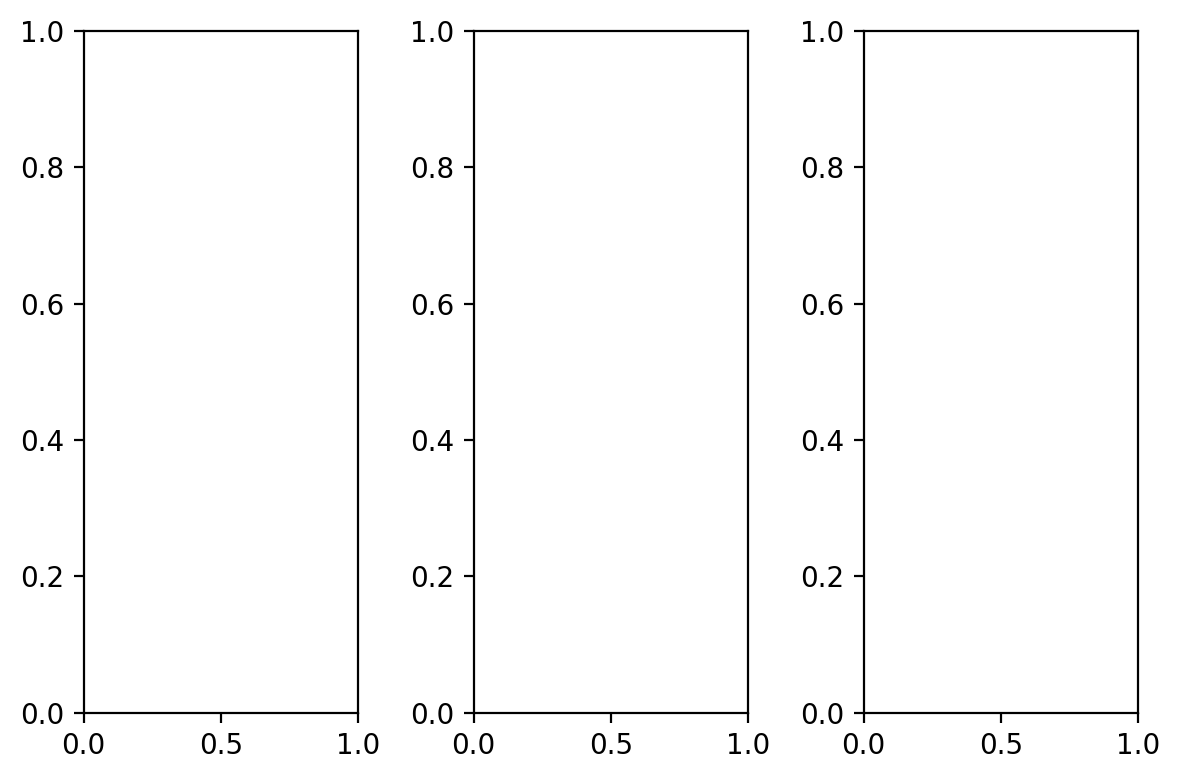

In [35]:
for i in range(len(meas_fitters)):
    print(meas_fitters[i].cal_matrix)
    
fig, axs2d = plt.subplots(nrows=1, ncols=3, dpi = 200)
fig.tight_layout()

norm = mpl.colors.Normalize(vmin=0, vmax=0.15)

for axs in axs2d:
    for ax in axs:
        im = ax.imshow(meas_fitters[i].cal_matrix, norm=norm)
fig.subplots_adjust(right=0.8)

#cmap = colours,


cbar = fig.add_axes([0.85, 0.15, 0.05, 0.75])
fig.colorbar(im, cax=cbar_ax)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


/tmp/ipykernel_633/2691989560.py:18: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(im, norm=norm)


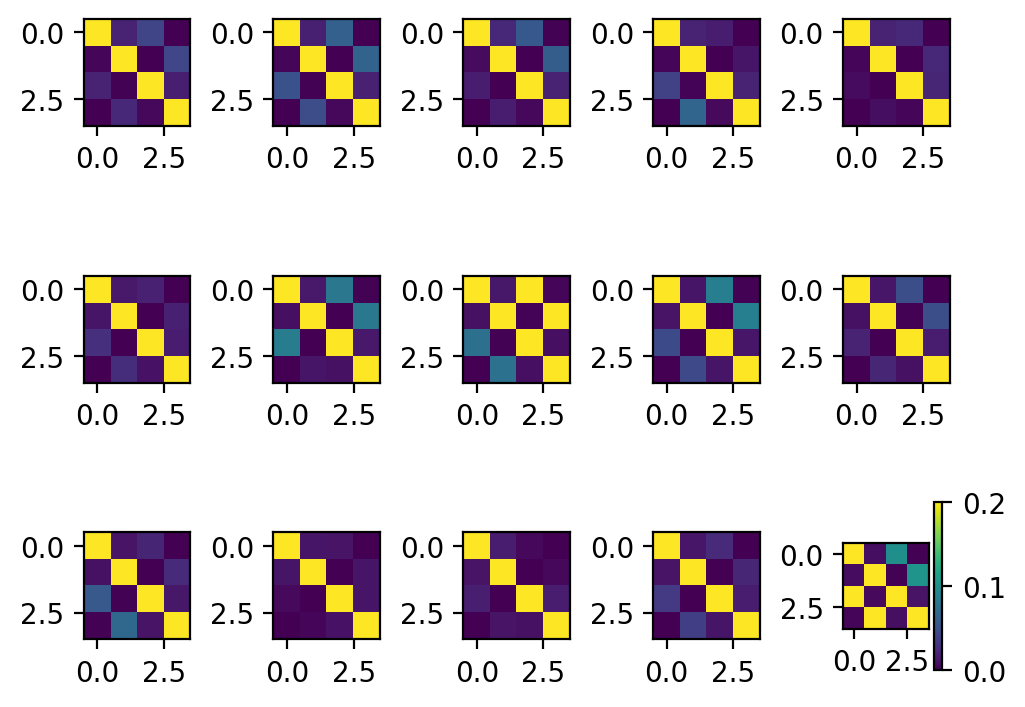

In [36]:
i = 0
fig, axs2d = plt.subplots(nrows=3, ncols=5, dpi = 200)
fig.tight_layout()

norm = mpl.colors.Normalize(vmin=0, vmax=0.2)

for axs in axs2d:
    for ax in axs:
        print(i)
        im = ax.imshow(meas_fitters[i].cal_matrix, norm=norm)
        i=i+1
fig.subplots_adjust(right=0.8)

#cmap = colours,


#cbar = fig.add_axes([0.85, 0.15, 0.05, 0.75])
fig.colorbar(im, norm=norm)
#cbar = fig.add_axes([0.85, 0.15, 0.05, 0.75])
#fig.colorbar(im, cax=cbar_ax)
# fig.colorbar(im, ticks=np.arange(C_p),cax=cbar)

#cbar.set_ylabel("", rotation=90, va="bottom")




        # ax.xlabel("input states")
        # ax.ylabel("output states")
        # ax.title("readout calibration matrix of qubit (6 , "+str(path[i])+") on Rigetti Aspen-11")
        # ax.show()

In [43]:
fig.savefig('2q-Cal.png')

In [47]:
norm = mpl.colors.Normalize(vmin=0, vmax=0.2)
fig.colorbar(im, norm=norm)
fig.show()

/tmp/ipykernel_224/3995283766.py:2: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(im, norm=norm)


In [23]:
for qubit, cal_matrix in zip(path, cal_matrices):
    print("qubit", 6, qubit, ": [", cal_matrix[0,3], cal_matrix[1,2], cal_matrix[2,1], cal_matrix[3,0], "]")

qubit 6 7 : [ 0.0029296875 0.00146484375 0.0115966796875 0.004638671875 ]
qubit 6 0 : [ 0.0103759765625 0.001220703125 0.0023193359375 0.000244140625 ]
qubit 6 1 : [ 0.008056640625 0.00048828125 0.00732421875 0.0006103515625 ]
qubit 6 16 : [ 0.010498046875 0.0010986328125 0.0013427734375 0.0 ]
qubit 6 17 : [ 0.013916015625 0.00048828125 0.01416015625 0.001953125 ]
qubit 6 10 : [ 0.003173828125 0.0003662109375 0.00341796875 0.000732421875 ]
qubit 6 11 : [ 0.008056640625 0.0009765625 0.00390625 0.0003662109375 ]
qubit 6 26 : [ 0.001220703125 0.0003662109375 0.0045166015625 0.0003662109375 ]
qubit 6 27 : [ 0.0062255859375 0.000732421875 0.005126953125 0.0006103515625 ]
qubit 6 20 : [ 0.00244140625 0.000244140625 0.0052490234375 0.000244140625 ]
qubit 6 21 : [ 0.0035400390625 0.000732421875 0.011962890625 0.0018310546875 ]
qubit 6 36 : [ 0.0013427734375 0.0006103515625 0.001220703125 0.0 ]
qubit 6 37 : [ 0.00439453125 0.0001220703125 0.0380859375 0.005615234375 ]
qubit 6 30 : [ 0.004394531

# Check the correctness

In [24]:
job = execute(meas_calibs, backend, shots=1 << 13, initial_layout=[6,100], optimization_level=3)

/opt/conda/lib/python3.9/site-packages/qiskit_rigetti/_qcs_job.py:117: UserWarning: barriers are currently omitted during execution on a RigettiQCSBackend
  warnings.warn("barriers are currently omitted during execution on a RigettiQCSBackend")
/opt/conda/lib/python3.9/site-packages/rpcq/_client.py:202: UserWarning: SIMPLE-WARNING: Unhandled pragma in qubit relabeling: #<PRAGMA OPENQASM 2.0>
  warn(f"{warning.kind}: {warning.body}")


# Tensor Product Noise Model (not used)

In [ ]:
result = records["result"]
meas_fitter = records["meas_fitter"]
cal_matrix = meas_fitter.cal_matrix

In [3]:
from qiskit.ignis.mitigation.measurement import TensoredMeasFitter

In [5]:
from qiskit.result import Result

def separate_results(one_job_results):
    return [Result(backend_name=one_job_results.backend_name,
                   backend_version=one_job_results.backend_version,
                   qobj_id=one_job_results.qobj_id,
                   job_id=one_job_results.job_id,
                   success=True,
                   results=[results]) for results in one_job_results.results]


def merge_results(results_list):
    results = []
    for res in results_list:
        results += res.results
    return Result(backend_name=results_list[0].backend_name,
                  backend_version=results_list[0].backend_version,
                  qobj_id=results_list[0].qobj_id,
                  job_id=results_list[0].job_id,
                  success=True,
                  results=results)

In [6]:
results_list = separate_results(result)

In [7]:
len(results_list)

256

In [8]:
tensored_result = merge_results([results_list[0], results_list[-1]])

In [21]:
tensored_fitter = TensoredMeasFitter(tensored_result, mit_pattern=[[i] for i in range(num_qubits)])

In [22]:
tensored_fitter.cal_matrices

[array([[0.98364258, 0.10070801],
        [0.01635742, 0.89929199]]),
 array([[0.94384766, 0.07263184],
        [0.05615234, 0.92736816]]),
 array([[0.94445801, 0.12524414],
        [0.05554199, 0.87475586]]),
 array([[0.81604004, 0.13793945],
        [0.18395996, 0.86206055]]),
 array([[0.93054199, 0.09289551],
        [0.06945801, 0.90710449]]),
 array([[0.90795898, 0.0390625 ],
        [0.09204102, 0.9609375 ]]),
 array([[0.98486328, 0.05224609],
        [0.01513672, 0.94775391]]),
 array([[0.9329834 , 0.03234863],
        [0.0670166 , 0.96765137]])]

- 

# TODO

- check the difference of the full calibration matrix and tensor product of the single qubit calibration matrix
- check the difference of the magnitude of the correlations between different order of correlation: 2-qubit / 3-qubit

$\rho_{ABC}$→$\rho_A, \rho_B, \rho_C$

$\rho_A, \rho_B, \rho_C$→$\rho_{ABC}$

$\rho_{AB}$, $\rho_{BC}$, $\rho_{CA}$, $\rho_A, \rho_B, \rho_C$